# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [36]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [37]:
# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image_dimensions: (32, 32, 3)
Number_of_classes: 100


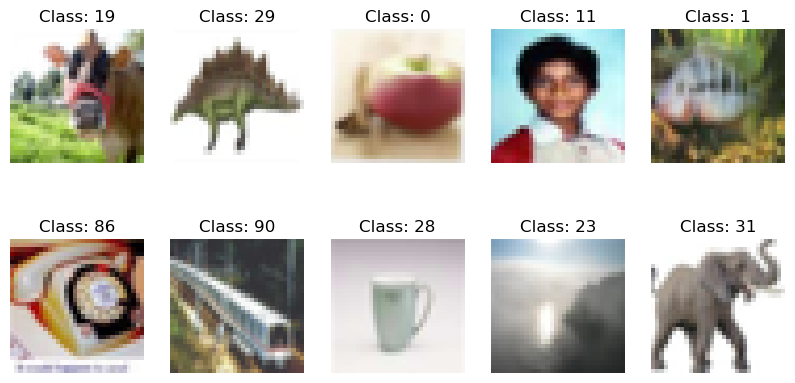

In [38]:
# Shape of training and test sets
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Image dimensions
print("Image_dimensions:", x_train.shape[1:])

# Number of classes
num_classes = len(np.unique(y_train))
print("Number_of_classes:", num_classes)

# Few examples from training set 

plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i])
  plt.title(f"Class: {y_train[i][0]}")
  plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [39]:
# Normalize the images to pixel values in range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# convert the labels to one-hot encoded vectors
num_classes=100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [40]:
model = Sequential()

#first convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

#Flatten
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax')) 

# Print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 4096)              0         
                                                                 
 dense_20 (Dense)            (None, 512)             

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [42]:
from keras import optimizers

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 'adam' optimizer is used as it is an efficient optimization algorithm for deep learning models.
#  It adapts the learning rate for each parameter individually, leading to faster convergence and better performance.

# The loss function 'categorical_crossentropy' is suitable for classification problems which is multi class. In this case the labels are one-hot encoded.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [43]:
# Train the model
from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val),verbose=1)

Epoch 1/30
1250/1250 [==============================] - 48s 38ms/step - loss: 3.6042 - accuracy: 0.1572 - val_loss: 3.0339 - val_accuracy: 0.2570
Epoch 2/30
1250/1250 [==============================] - 55s 44ms/step - loss: 2.7675 - accuracy: 0.3079 - val_loss: 2.7031 - val_accuracy: 0.3251
Epoch 3/30
1250/1250 [==============================] - 56s 45ms/step - loss: 2.3352 - accuracy: 0.3970 - val_loss: 2.6230 - val_accuracy: 0.3538
Epoch 4/30
1250/1250 [==============================] - 53s 42ms/step - loss: 1.9842 - accuracy: 0.4752 - val_loss: 2.6097 - val_accuracy: 0.3578
Epoch 5/30
1250/1250 [==============================] - 49s 39ms/step - loss: 1.6476 - accuracy: 0.5523 - val_loss: 2.6149 - val_accuracy: 0.3793
Epoch 6/30
1250/1250 [==============================] - 49s 39ms/step - loss: 1.3199 - accuracy: 0.6322 - val_loss: 2.8312 - val_accuracy: 0.3744
Epoch 7/30
1250/1250 [==============================] - 49s 39ms/step - loss: 1.0107 - accuracy: 0.7137 - val_loss: 3.1908 -

In [44]:

# Print training and validation accuracy and loss
print("Training Loss and Accuracy:")
for epoch, (loss, accuracy) in enumerate(zip(history.history['loss'], history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

print("\nValidation Loss and Accuracy:")
for epoch, (val_loss, val_accuracy) in enumerate(zip(history.history['val_loss'], history.history['val_accuracy'])):
    print(f"Epoch {epoch+1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")

Training Loss and Accuracy:
Epoch 1: Loss = 3.6042, Accuracy = 0.1572
Epoch 2: Loss = 2.7675, Accuracy = 0.3079
Epoch 3: Loss = 2.3352, Accuracy = 0.3970
Epoch 4: Loss = 1.9842, Accuracy = 0.4752
Epoch 5: Loss = 1.6476, Accuracy = 0.5523
Epoch 6: Loss = 1.3199, Accuracy = 0.6322
Epoch 7: Loss = 1.0107, Accuracy = 0.7137
Epoch 8: Loss = 0.7549, Accuracy = 0.7802
Epoch 9: Loss = 0.5484, Accuracy = 0.8387
Epoch 10: Loss = 0.4090, Accuracy = 0.8764
Epoch 11: Loss = 0.3246, Accuracy = 0.9003
Epoch 12: Loss = 0.2624, Accuracy = 0.9200
Epoch 13: Loss = 0.2316, Accuracy = 0.9263
Epoch 14: Loss = 0.2157, Accuracy = 0.9329
Epoch 15: Loss = 0.1705, Accuracy = 0.9466
Epoch 16: Loss = 0.1706, Accuracy = 0.9450
Epoch 17: Loss = 0.1633, Accuracy = 0.9492
Epoch 18: Loss = 0.1680, Accuracy = 0.9480
Epoch 19: Loss = 0.1353, Accuracy = 0.9579
Epoch 20: Loss = 0.1530, Accuracy = 0.9538
Epoch 21: Loss = 0.1271, Accuracy = 0.9606
Epoch 22: Loss = 0.1261, Accuracy = 0.9617
Epoch 23: Loss = 0.1326, Accuracy =

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 32.87
- <b>Other metric:</b> _Precision
- <b>Reason for selection:</b> Precision is helpful in understanding the quality of positive predictions, It helps in minimizing false positives.
- <b>Value of metric:</b> 33.75
- <b>Interpretation of metric value:</b> _About 33.75% of predictions are correct. This value says the model needs improvement_____

In [45]:
from sklearn.metrics import precision_score

# Evaluate the model on the test data set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy calculated:", test_accuracy)

# precision calculation

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precision:", precision)

313/313 - 2s - loss: 9.7391 - accuracy: 0.3287 - 2s/epoch - 7ms/step
Test Accuracy calculated: 0.3287000060081482
313/313 [==============================] - 2s 7ms/step
Precision: 0.3375349847862427


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

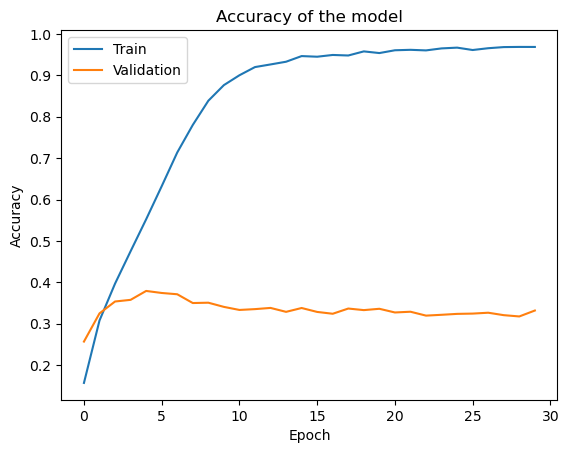

313/313 [==============================] - 2s 8ms/step


Text(0.5, 1.0, 'Incorrectly Classified: Probability: 85.42%')

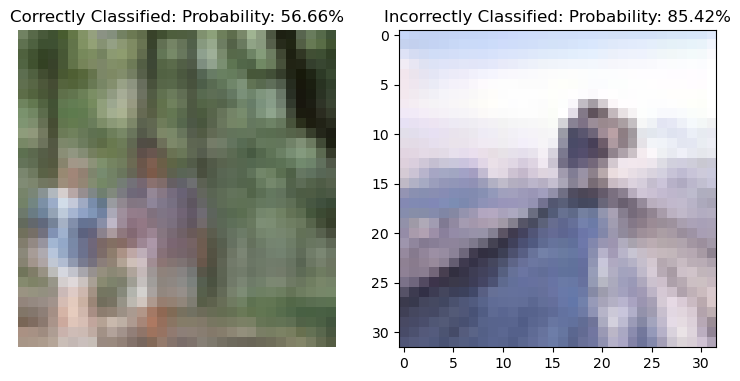

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Find correctly and incorrectly classified images
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)


correct_indices = np.where(y_pred_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(y_pred_classes != np.argmax(y_test, axis=1))[0]

correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]


correct_image_probs = y_pred[correct_index]
incorrect_image_probs = y_pred[incorrect_index]

correct_image_pred_prob = correct_image_probs[y_pred_classes[correct_index]] * 100
incorrect_image_pred_prob = incorrect_image_probs[y_pred_classes[incorrect_index]] * 100

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f'Correctly Classified: Probability: {correct_image_pred_prob:.2f}%')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f'Incorrectly Classified: Probability: {incorrect_image_pred_prob:.2f}%')




## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [48]:

from keras.layers import Dropout

model = Sequential()

#first convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Dropout after the first MaxPooling layer
model.add(Dropout(0.25))


# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Dropout after the second MaxPooling layer
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(100, activation='softmax')) 

# Print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 8, 8, 64)        

Added drop out layers after max pooling layers and before the output layer. This drops out a few during each training epoch and helps prevent overfitting. I expect to see increased accuracy after adding drop out layer.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
history_modified = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val),verbose=1)



Epoch 1/30
1250/1250 [==============================] - 51s 40ms/step - loss: 3.9661 - accuracy: 0.0926 - val_loss: 3.4628 - val_accuracy: 0.1967
Epoch 2/30
1250/1250 [==============================] - 55s 44ms/step - loss: 3.3716 - accuracy: 0.1940 - val_loss: 3.0434 - val_accuracy: 0.2662
Epoch 3/30
1250/1250 [==============================] - 55s 44ms/step - loss: 3.0910 - accuracy: 0.2430 - val_loss: 2.8064 - val_accuracy: 0.3105
Epoch 4/30
1250/1250 [==============================] - 55s 44ms/step - loss: 2.8971 - accuracy: 0.2790 - val_loss: 2.7044 - val_accuracy: 0.3351
Epoch 5/30
1250/1250 [==============================] - 55s 44ms/step - loss: 2.7624 - accuracy: 0.3025 - val_loss: 2.5828 - val_accuracy: 0.3532
Epoch 6/30
1250/1250 [==============================] - 50s 40ms/step - loss: 2.6451 - accuracy: 0.3289 - val_loss: 2.5601 - val_accuracy: 0.3562
Epoch 7/30
1250/1250 [==============================] - 50s 40ms/step - loss: 2.5571 - accuracy: 0.3404 - val_loss: 2.4665 -

In [52]:
from sklearn.metrics import precision_score

# Evaluate the model on the test data set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy calculated:", test_accuracy)

# precision calculation

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precision:", precision)

313/313 - 2s - loss: 2.3915 - accuracy: 0.4116 - 2s/epoch - 6ms/step
Test Accuracy calculated: 0.4115999937057495
313/313 [==============================] - 2s 7ms/step
Precision: 0.4179281094599475


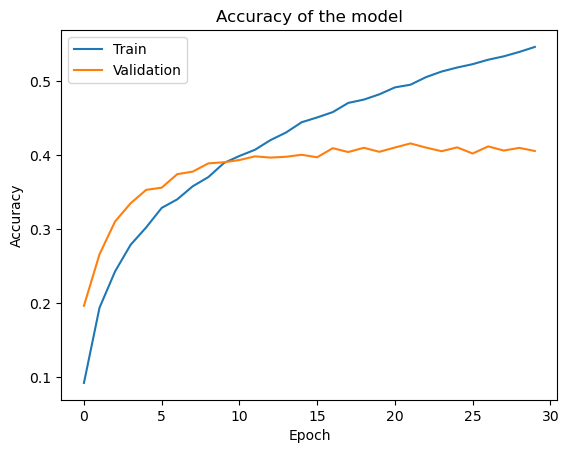

313/313 [==============================] - 2s 6ms/step


Text(0.5, 1.0, 'Incorrectly Classified: Probability: 33.04%')

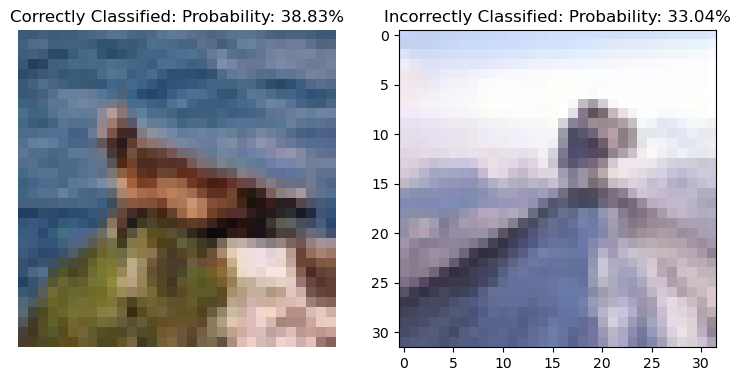

In [51]:
plt.plot(history_modified.history['accuracy'], label='accuracy')
plt.plot(history_modified.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Find correctly and incorrectly classified images
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)


correct_indices = np.where(y_pred_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(y_pred_classes != np.argmax(y_test, axis=1))[0]

correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]


correct_image_probs = y_pred[correct_index]
incorrect_image_probs = y_pred[incorrect_index]

correct_image_pred_prob = correct_image_probs[y_pred_classes[correct_index]] * 100
incorrect_image_pred_prob = incorrect_image_probs[y_pred_classes[incorrect_index]] * 100

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f'Correctly Classified: Probability: {correct_image_pred_prob:.2f}%')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f'Incorrectly Classified: Probability: {incorrect_image_pred_prob:.2f}%')

### Task 4c: Discussion of the results

- Briefly discuss the results. 


- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

There is a slight improvement in test accuracy and precision after adding dropout. This 
suggests that the model is less prone to overfitting with added drop out.
 This model can be definetly improved better by utlizing improved architecture patterns of deep learning like data augmentation and hyper paramter tuning. The model should be evaluated using different optimizers like SGD as well. 


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.